<a href="https://colab.research.google.com/github/aphidgolf/mldltraining/blob/master/%E5%82%B5%E5%8B%99%E4%B8%8D%E5%B1%A5%E8%A1%8C%E4%BA%88%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
!ls '/content/drive/My Drive/MLDL/SIGNATE/債務不履行リスクの低減/input' 

submit.csv  test.csv  train.csv


In [61]:
input_path = '/content/drive/My Drive/MLDL/SIGNATE/債務不履行リスクの低減/input/'
output_path = '/content/drive/My Drive/MLDL/SIGNATE/債務不履行リスクの低減/output/'

In [62]:
train = pd.read_csv(f'{input_path}train.csv')
test = pd.read_csv(f'{input_path}test.csv')
submit = pd.read_csv(f'{input_path}submit.csv')

In [63]:
train.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,0,609.296068,3 years,8.421982,A5,0 years,debt_consolidation,714.061803,Individual,FullyPaid
1,1,1183.266999,5 years,10.286776,B1,10 years,credit_card,697.706701,Individual,ChargedOff
2,2,695.783256,3 years,14.723425,C2,1 year,debt_consolidation,656.419357,Individual,FullyPaid
3,3,738.392546,3 years,14.260708,C1,0 years,credit_card,657.906852,Individual,FullyPaid
4,4,1642.400654,5 years,25.217452,E5,10 years,debt_consolidation,662.972297,Individual,FullyPaid


In [64]:
test.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type
0,242150,1161.830205,3 years,13.105362,C1,10 years,credit_card,682.016083,Individual
1,242151,2257.465815,5 years,14.196200,C5,10 years,debt_consolidation,668.240313,Individual
2,242152,2182.137002,3 years,8.307772,A5,10 years,credit_card,703.277694,Individual
3,242153,520.284912,3 years,6.956504,A2,7 years,debt_consolidation,731.138779,Individual
4,242154,2303.349549,3 years,11.658497,B3,6 years,debt_consolidation,698.368991,Individual


In [65]:
print(train.columns)
print(test.columns)

Index(['id', 'loan_amnt', 'term', 'interest_rate', 'grade',
       'employment_length', 'purpose', 'credit_score', 'application_type',
       'loan_status'],
      dtype='object')
Index(['id', 'loan_amnt', 'term', 'interest_rate', 'grade',
       'employment_length', 'purpose', 'credit_score', 'application_type'],
      dtype='object')


In [66]:
print(train.shape)
print(test.shape)

(242150, 10)
(26900, 9)


In [67]:
# submit.head()

In [68]:
train.isnull().sum()

id                   0
loan_amnt            0
term                 0
interest_rate        0
grade                0
employment_length    0
purpose              0
credit_score         0
application_type     0
loan_status          0
dtype: int64

In [69]:
test.isnull().sum()

id                   0
loan_amnt            0
term                 0
interest_rate        0
grade                0
employment_length    0
purpose              0
credit_score         0
application_type     0
dtype: int64

In [70]:
train.dtypes

id                     int64
loan_amnt            float64
term                  object
interest_rate        float64
grade                 object
employment_length     object
purpose               object
credit_score         float64
application_type      object
loan_status           object
dtype: object

In [71]:
test.dtypes

id                     int64
loan_amnt            float64
term                  object
interest_rate        float64
grade                 object
employment_length     object
purpose               object
credit_score         float64
application_type      object
dtype: object

## Start EDA

In [72]:
# ax = sns.distplot(train['loan_status'])
train['loan_status'].value_counts()
# unbalanced data
# FullyPaid ---> random reduce

FullyPaid     199794
ChargedOff     42356
Name: loan_status, dtype: int64

In [73]:
cat_columns = ['term','grade','employment_length','purpose','application_type']
train_cat_df = train[cat_columns]
train_cat_df.head()
# train['id'].dtype

,term,grade,employment_length,purpose,application_type
0,3 years,A5,0 years,debt_consolidation,Individual
1,5 years,B1,10 years,credit_card,Individual
2,3 years,C2,1 year,debt_consolidation,Individual
3,3 years,C1,0 years,credit_card,Individual
4,5 years,E5,10 years,debt_consolidation,Individual


In [74]:
# term, employment_length column
print(train['term'].unique())
print(train['employment_length'].unique())
print(train['grade'].unique())

['3 years' '5 years']
['0 years' '10 years' '1 year' '2 years' '3 years' '6 years' '9 years'
 '7 years' '4 years' '5 years' '8 years']
['A5' 'B1' 'C2' 'C1' 'E5' 'D5' 'B4' 'A3' 'D3' 'C3' 'A2' 'D1' 'A1' 'C5'
 'A4' 'C4' 'E4' 'B2' 'B5' 'D2' 'D4' 'B3' 'E2' 'E1' 'E3' 'F3' 'F5']


In [75]:
train.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,0,609.296068,3 years,8.421982,A5,0 years,debt_consolidation,714.061803,Individual,FullyPaid
1,1,1183.266999,5 years,10.286776,B1,10 years,credit_card,697.706701,Individual,ChargedOff
2,2,695.783256,3 years,14.723425,C2,1 year,debt_consolidation,656.419357,Individual,FullyPaid
3,3,738.392546,3 years,14.260708,C1,0 years,credit_card,657.906852,Individual,FullyPaid
4,4,1642.400654,5 years,25.217452,E5,10 years,debt_consolidation,662.972297,Individual,FullyPaid


## PreProcessing

In [76]:
# convert cat columns to numerical
# train['term_year'] = train['term'].str[:1]
# print(train['term'].str[:1])
# print(train['term_year'].dtype)
# print(train['employment_length'][4])
# train['employment_length_num'] = train['employment_length'].str.strip('years')
# df_train = pd.get_dummies(df_train)
def convert_cat_columns(df):
  df['term_year'] = df['term'].str[:1]
  df['employment_length_num'] = df['employment_length'].str.strip('years')
  df['term_year'] = df['term_year'].astype('int')
  df['employment_length_num'] = df['employment_length_num'].astype('int')
  df = df.drop(columns=['term','employment_length'])
  return df

In [77]:
# train['term_year'] = train['term_year'].astype('int')
# train['employment_length_num'] = train['employment_length_num'].astype('int')
train_temp = convert_cat_columns(train)
test_temp = convert_cat_columns(test)

print(train_temp.dtypes)
print(test_temp.dtypes)

id                         int64
loan_amnt                float64
interest_rate            float64
grade                     object
purpose                   object
credit_score             float64
application_type          object
loan_status               object
term_year                  int64
employment_length_num      int64
dtype: object
id                         int64
loan_amnt                float64
interest_rate            float64
grade                     object
purpose                   object
credit_score             float64
application_type          object
term_year                  int64
employment_length_num      int64
dtype: object


In [78]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Change Target Encoding?

In [79]:
def label_encode(df,columns):
  for column in columns:
    df[column] = le.fit_transform(df[column])
  return df


In [80]:
def one_hot_eoncode(df,columns):
  df = pd.get_dummies(df, columns=columns)
  return df 

In [81]:
# label encode
columns = ['grade','application_type']
train_temp = label_encode(train_temp, columns)
test_temp = label_encode(test_temp, columns)

In [82]:
# one-hot encode
columns = ['purpose']
train_temp = one_hot_eoncode(train_temp, columns)
test_temp = one_hot_eoncode(test_temp, columns)

In [83]:
train_temp.head()

,id,loan_amnt,interest_rate,grade,credit_score,application_type,loan_status,term_year,employment_length_num,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_other,purpose_small_business
0,0,609.296068,8.421982,4,714.061803,0,FullyPaid,3,0,0,0,1,0,0,0,0,0,0
1,1,1183.266999,10.286776,5,697.706701,0,ChargedOff,5,10,0,1,0,0,0,0,0,0,0
2,2,695.783256,14.723425,11,656.419357,0,FullyPaid,3,1,0,0,1,0,0,0,0,0,0
3,3,738.392546,14.260708,10,657.906852,0,FullyPaid,3,0,0,1,0,0,0,0,0,0,0
4,4,1642.400654,25.217452,24,662.972297,0,FullyPaid,5,10,0,0,1,0,0,0,0,0,0


In [84]:
train_temp['loan_status'] = le.fit_transform(train_temp['loan_status'])

In [85]:
test_temp.head()

,id,loan_amnt,interest_rate,grade,credit_score,application_type,term_year,employment_length_num,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business
0,242150,1161.830205,13.105362,10,682.016083,0,3,10,0,1,0,0,0,0,0,0,0,0
1,242151,2257.465815,14.196200,14,668.240313,0,5,10,0,0,1,0,0,0,0,0,0,0
2,242152,2182.137002,8.307772,4,703.277694,0,3,10,0,1,0,0,0,0,0,0,0,0
3,242153,520.284912,6.956504,1,731.138779,0,3,7,0,0,1,0,0,0,0,0,0,0
4,242154,2303.349549,11.658497,7,698.368991,0,3,6,0,0,1,0,0,0,0,0,0,0


In [86]:
train_temp.columns[0]

'id'

In [87]:
def make_plot(df,row,col):
  plt.figure()
  fig, ax = plt.subplots()
  ax.scatter(x = df[df.columns[row]], y = df[df.columns[col]])
  plt.ylabel(df.columns[col], fontsize=13)
  plt.xlabel(df.columns[row], fontsize=13)
  plt.show()

In [88]:
train_temp.columns

Index(['id', 'loan_amnt', 'interest_rate', 'grade', 'credit_score',
       'application_type', 'loan_status', 'term_year', 'employment_length_num',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_other', 'purpose_small_business'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

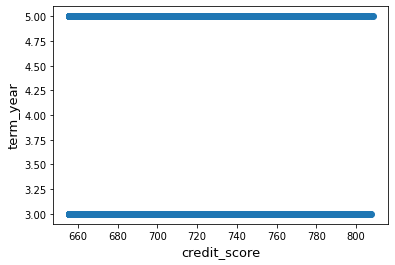

In [89]:
# make_plot(train_temp,0,1)
# make_plot(train_temp,1,8)
# make_plot(train_temp,1,7)
# make_plot(train_temp,2,7)
# make_plot(train_temp,3,7)
make_plot(train_temp,4,7) # purpose 4 is all ChargedOff
# make_plot(train_temp,5,7) # credit_score
# make_plot(train_temp,6,7) # application_type
# make_plot(train_temp,8,7) # term_year

In [90]:
# train_temp['purpose'].unique()

In [91]:
# print(train_temp[train_temp['purpose']=='house']['loan_status'].unique())

## FeatureEngineering

In [92]:
def make_new_feature(df):
  df['loan_amnt_per_year'] = df['loan_amnt']/df['term_year']
  df = df.drop(columns=['loan_amnt','term_year'])
  # drop columns
  df = df.drop(columns=['purpose_debt_consolidation','purpose_credit_card','purpose_medical',
                        'purpose_other','purpose_home_improvement','purpose_car','purpose_major_purchase','purpose_small_business'])
  return df

In [93]:
train_temp.head()

,id,loan_amnt,interest_rate,grade,credit_score,application_type,loan_status,term_year,employment_length_num,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_other,purpose_small_business
0,0,609.296068,8.421982,4,714.061803,0,1,3,0,0,0,1,0,0,0,0,0,0
1,1,1183.266999,10.286776,5,697.706701,0,0,5,10,0,1,0,0,0,0,0,0,0
2,2,695.783256,14.723425,11,656.419357,0,1,3,1,0,0,1,0,0,0,0,0,0
3,3,738.392546,14.260708,10,657.906852,0,1,3,0,0,1,0,0,0,0,0,0,0
4,4,1642.400654,25.217452,24,662.972297,0,1,5,10,0,0,1,0,0,0,0,0,0


In [94]:
train_temp = make_new_feature(train_temp)
test_temp = make_new_feature(test_temp)

In [95]:
train_temp.columns

Index(['id', 'interest_rate', 'grade', 'credit_score', 'application_type',
       'loan_status', 'employment_length_num', 'purpose_house',
       'loan_amnt_per_year'],
      dtype='object')

In [96]:
# make_plot(train_temp,18,6)

In [97]:
train_temp['loan_status'].value_counts()

1    199794
0     42356
Name: loan_status, dtype: int64

In [98]:
# 20201012new https://qiita.com/Masahiro_T/items/df1656172d9944583857

def under_sampling(X, target_column_name, minority_label):

    # 毎回出るので非表示に
    import warnings
    warnings.simplefilter('ignore', pd.core.common.SettingWithCopyWarning)

    # majority と minority に分ける
    X_majority = X.query(f'{target_column_name} != {minority_label}')
    X_minority = X.query(f'{target_column_name} == {minority_label}')

    # KMeansでクラスタリング
    from sklearn.cluster import KMeans
    km = KMeans(random_state=43)
    km.fit(X_majority)
    X_majority['Cluster'] = km.predict(X_majority)

    # クラスタごとに何サンプル抽出するか計算
    ratio = X_majority['Cluster'].value_counts() / X_majority.shape[0] 
    n_sample_ary = (ratio * X_minority.shape[0]).astype('int64').sort_index()

    # クラスタごとにサンプルを抽出
    dfs = []
    for i, n_sample in enumerate(n_sample_ary):
        dfs.append(X_majority.query(f'Cluster == {i}').sample(n_sample))

    # minority データも結合するようにしておく
    dfs.append(X_minority)

    # アンダーサンプリング後のデータを作成
    X_new = pd.concat(dfs, sort=True)

    # 不要なので削除
    X_new = X_new.drop('Cluster', axis=1)

    return X_new

In [99]:
train_temp = under_sampling(train_temp, 'loan_status', 0)

In [100]:
train_temp['loan_status'].value_counts()

0    42356
1    42353
Name: loan_status, dtype: int64

## Modelling

In [101]:
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
import lightgbm as lgb
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [102]:
# cat_list = ['grade','application_type']
# for c in cat_list:
#     train_temp[c] = train_temp[c].astype('category')
#     test_temp[c] = test_temp[c].astype('category')

In [103]:
train_temp_x = train_temp.drop('loan_status', axis=1)
train_temp_y = train_temp['loan_status']

In [104]:
# train_temp_x.dtypes
# X_resampled.dtypes

In [105]:
params = {
    'objective':'binary',
    'seed':20,
    'boosting_type':'gbdt',
    'verbose':0,
    'learning_rate':0.05,
    'metrics':'binary_logloss',
    'num_boost_round':200,
    # 'early_stopping_rounds':10,
    # ,'categorical_feature': 'auto',
    'drop_rate': 0.15
    }


In [108]:
scores = []

kf = KFold(n_splits=10, shuffle=True, random_state=20)
for tr_idx, va_idx in kf.split(train_temp_x):
  tr_x, va_x = train_temp_x.iloc[tr_idx], train_temp_x.iloc[va_idx]
  tr_y, va_y = train_temp_y.iloc[tr_idx], train_temp_y.iloc[va_idx]
  # tr_x, va_x = X_train.iloc[tr_idx], X_train.iloc[va_idx]
  # tr_y, va_y = y_train.iloc[tr_idx], y_train.iloc[va_idx]
  

  lgb_train = lgb.Dataset(tr_x,tr_y)
  lgb_eval = lgb.Dataset(va_x,va_y)
  # lgb_train = lgb.Dataset(tr_x,tr_y,categorical_feature=cat_list)
  # lgb_eval = lgb.Dataset(va_x,va_y,categorical_feature=cat_list)
  
  # print(tr_x)
  # print(tr_y)
  
  # print(lgb_train)
  # print(lgb_eval)
  # model = Model(params)
  model = lgb.train(params
                    ,lgb_train
                    ,valid_names=['train','valid']
                    ,valid_sets=[lgb_train,lgb_eval]
                    # ,categorical_feature=cat_list
                    )
  # model.fit(tr_x,tr_y)
  va_pred = model.predict(va_x)
  print('va_y',va_y)
  va_pred = va_pred.round(0)
  va_pred = va_pred.astype(int)
  print('va_pred',va_pred)
  score = f1_score(va_y, va_pred)
  scores.append(score)

print(f'f1_score: {np.mean(scores):.4f}')

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	train's binary_logloss: 0.686384	valid's binary_logloss: 0.686049
[2]	train's binary_logloss: 0.680252	valid's binary_logloss: 0.679615
[3]	train's binary_logloss: 0.674676	valid's binary_logloss: 0.673827
[4]	train's binary_logloss: 0.669613	valid's binary_logloss: 0.668529
[5]	train's binary_logloss: 0.664988	valid's binary_logloss: 0.663781
[6]	train's binary_logloss: 0.660803	valid's binary_logloss: 0.659411
[7]	train's binary_logloss: 0.656943	valid's binary_logloss: 0.655434
[8]	train's binary_logloss: 0.653357	valid's binary_logloss: 0.65177
[9]	train's binary_logloss: 0.650093	valid's binary_logloss: 0.648426
[10]	train's binary_logloss: 0.647097	valid's binary_logloss: 0.645358
[11]	train's binary_logloss: 0.644366	valid's binary_logloss: 0.642563
[12]	train's binary_logloss: 0.641858	valid's binary_logloss: 0.639987
[13]	train's binary_logloss: 0.639572	valid's binary_logloss: 0.637596
[14]	train's binary_logloss: 0.637424	valid's binary_logloss: 0.635355
[15]	train's bin

In [109]:
test_temp_x = test_temp
pred = model.predict(test_temp_x)

In [110]:
pred = pred.round(0)
pred = pred.astype(int)
# f1_score(test_temp_x, pred)
print(pred)

[1 1 1 ... 1 1 1]


In [111]:
print(len(pred))
print(test.shape)

26900
(26900, 11)


In [112]:
pred = pd.Series(pred)
submit_final = pd.concat([test['id'],pred],axis=1)

In [113]:
submit_final

,id,0
0,242150,1
1,242151,1
2,242152,1
3,242153,1
4,242154,1
...,...,...
26895,269045,1
26896,269046,1
26897,269047,1
26898,269048,1


In [114]:
print(submit.shape)
# submit_final.to_csv(f'{output_path}submit_20201008.csv',header=None,index=False)
# submit_final.to_csv(f'{output_path}submit_20201008_5.csv',header=None,index=False)
submit_final.to_csv(f'{output_path}submit_20201012_1.csv',header=None,index=False)
# submit_restore = pd.read_csv(f'{output_path}submit_20201008.csv')
# print(submit_restore.shape)

(26899, 2)


In [ ]:
submit_final.describe()